# IMPORT

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import linecache

# bisinis understanding
tujuan utama dari proyek ini,untuk membantu agen real estate dalam menentukan harga yang sesuai untuk properti, atau untuk membantu calon pembeli dalam menemukan rumah yang cocok dengan anggaran mereka.

# Link Kaggle

https://www.kaggle.com/datasets/mohamedafsal007/house-price-dataset-of-india

# memanggil data set

In [3]:
df = pd.read_csv('House Price India.csv')

In [4]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


# DATA Prepation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [6]:
df.isna().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

<Axes: >

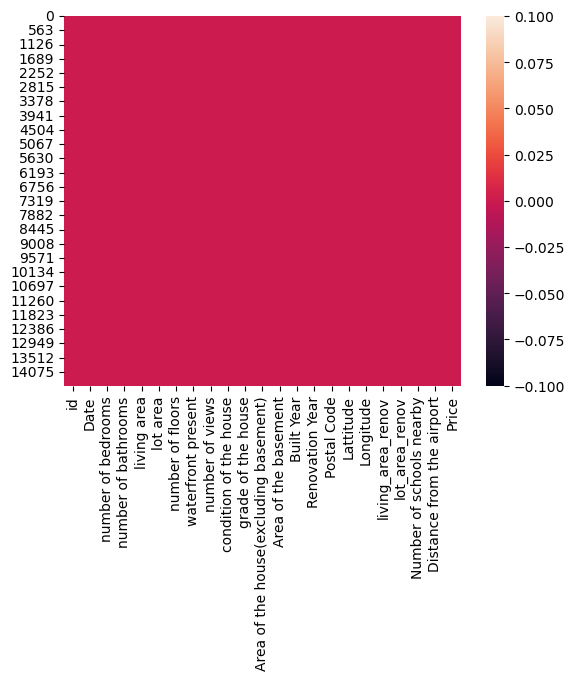

In [7]:
sns.heatmap(df.isnull())

# Pemahaman Data

In [8]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


<Axes: >

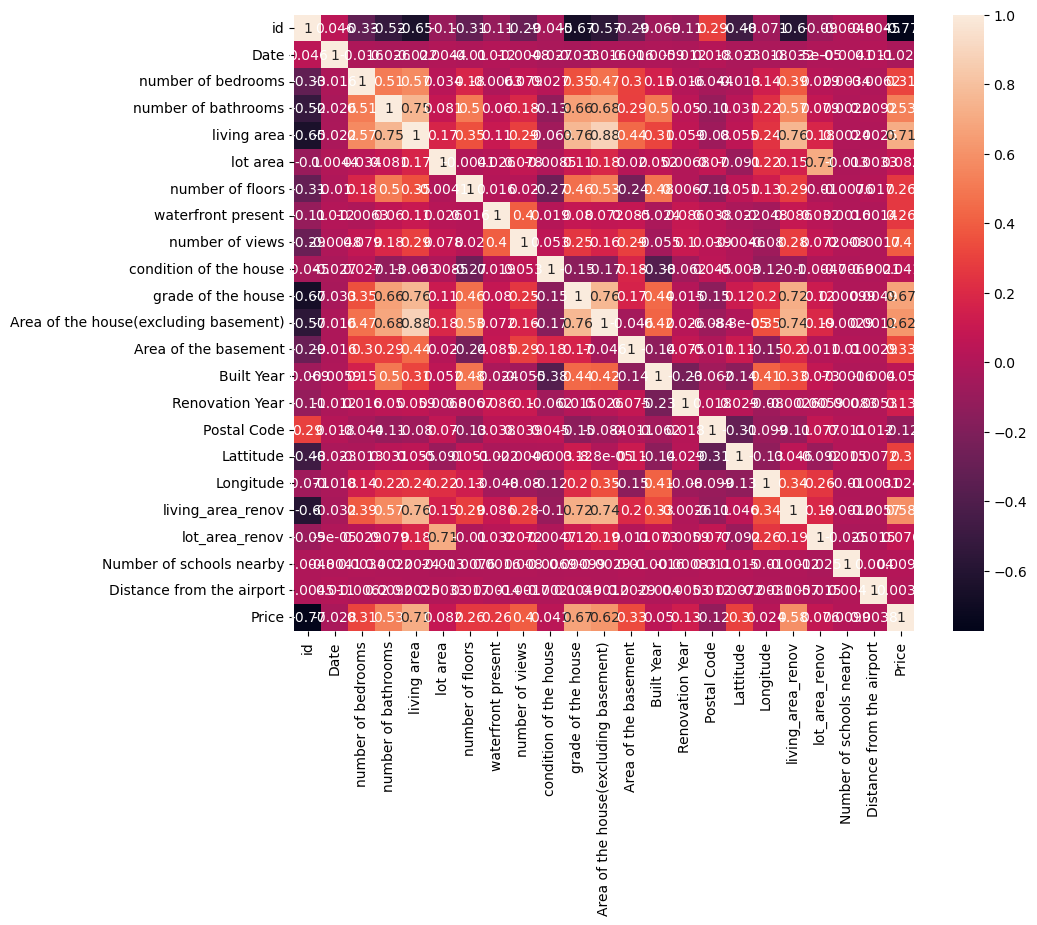

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [20]:
df.rename(columns = {"Area of the house(excluding basement)": "Area of the house_excluding basement"},inplace=True)
df.rename(columns = {"number of bedrooms": "number_of_bedrooms"},inplace=True)
df.rename(columns = {"number of bathrooms": "number_of_bathroom"},inplace=True)
df.rename(columns = {"living area": "living_area"},inplace=True)
df.rename(columns = {"number of floors": "number_of_floors"},inplace=True)
df.rename(columns = {"waterfront present": "waterfront_present"},inplace=True)
df.rename(columns = {"number of views": "number_of_views"},inplace=True)
df.rename(columns = {"grade of the house": "grade_of_the_house"},inplace=True)
df.rename(columns = {"Area of the house_excluding basement": "Area_of_the_house_excluding_basement"},inplace=True)
df.rename(columns = {"Area of the basement": "Area_of_the_basement"},inplace=True)


# Modeling

In [23]:
features = ['number_of_bedrooms','number_of_bathroom','living_area','number_of_floors','waterfront_present','number_of_views','grade_of_the_house','Area_of_the_house_excluding_basement','Area_of_the_basement','Lattitude','living_area_renov']
x = df[features]
y = df['Price']
x.shape, y.shape

((14620, 11), (14620,))

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=10)
y_test.shape

(3655,)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [26]:
score = lr.score(x_test,y_test)
print('Akurasi model Regresi Linear', score)

Akurasi model Regresi Linear 0.6732835819403372


# Membuat input model

In [27]:
input_data = np.array([[5,2.5,3650,2,0,4,10,3370,280,528.645,2880]])

prediction = lr.predict(input_data)
print('Estimasi Harga rumah adalah :',prediction)

Estimasi Harga rumah adalah : [3.16398762e+08]


c:\Users\bmkus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# deployment

# Saving model

In [29]:
import pickle

filename = 'estimmasi_harga_rumah_india_fix.sav'
pickle.dump(lr,open(filename,'wb'))

# link streamlit
https://rahmatogi-uts-stream-ogi-4t7os2.streamlit.app/